In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

import seaborn as sns

In [63]:
#df = pd.read_csv("../output/data/structural_split_train_with_embeddings.csv")
df = pd.read_csv("../output/data/esm2_t33_650M_UR50D_structural_split_train_with_embeddings.csv")
df.head()   

,entry,protein2,uniprot_description,rank,protein1,protein_name,function,GPT_description,all_description,protein1_embedding,protein2_embedding,cosine_similarity
0,B2GUB3-K139E,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Decreased monoglycylation activity.,NaN,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Tubulin tyrosine ligase 3,Monoglycylase which modifies alpha- and beta-t...,The site specificity of TTLL enzymes and their...,Decreased monoglycylation activity. The site s...,[ 0.01214568 -0.04332356 -0.0007308 ... -0.06...,[ 0.01275638 -0.04228364 -0.00106817 ... -0.06...,0.999988
1,Q9V3Z1-K266R,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,No effect on mitosis. Embryos display an early...,NaN,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,Tribbles,Adapter protein that negatively regulates diff...,NaN,No effect on mitosis. Embryos display an early...,[ 0.01637928 0.00050949 0.03739894 ... -0.06...,[ 0.01642649 0.00180939 0.03922254 ... -0.06...,0.999982
2,Q16643-G10R,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,NaN,-1.0,MAGVSFSGHGLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Drebrin,Actin cytoskeleton-organizing protein that pla...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,[ 0.0507356 -0.05168814 -0.00707871 ... -0.12...,[ 0.04893136 -0.05080944 -0.00736171 ... -0.12...,0.999987
3,P08622-A44E,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAEAK...,NaN,-1.0,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAAAK...,Chaperone protein DnaJ,Interacts with DnaK and GrpE to disassemble a ...,Enhances effect. The mutation in the DnaJ prot...,Enhances effect. The mutation in the DnaJ prot...,[ 0.00811219 -0.05455351 0.00590292 ... -0.11...,[ 0.01132672 -0.05648498 0.003806 ... -0.12...,0.999947
4,Q0D2I5-A487R,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Loss of interaction with XRCC4; when associate...,NaN,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Non-homologous end joining factor IFFO1,Nuclear matrix protein involved in the immobil...,NaN,Loss of interaction with XRCC4; when associate...,[ 0.02165283 -0.10791481 -0.0214048 ... -0.10...,[ 0.02011781 -0.10626449 -0.02037244 ... -0.10...,0.999966


In [64]:
df.shape

(2000, 12)

In [65]:
df.columns

Index(['entry', 'protein2', 'uniprot_description', 'rank', 'protein1',
       'protein_name', 'function', 'GPT_description', 'all_description',
       'protein1_embedding', 'protein2_embedding', 'cosine_similarity'],
      dtype='object')

In [67]:
df['protein1_embedding'].iloc[0]

'[ 0.01214568 -0.04332356 -0.0007308  ... -0.06929744 -0.00193151\n  0.03098106]'

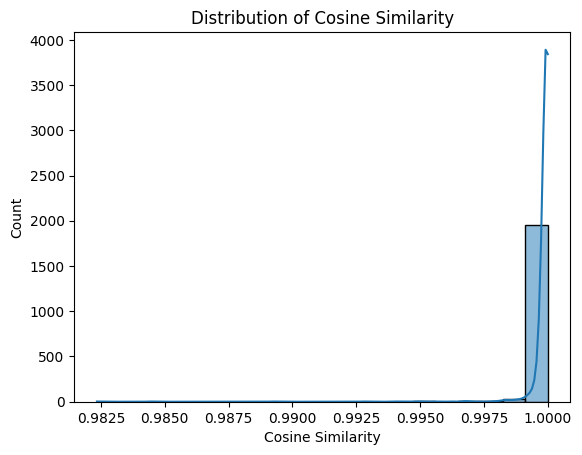

In [59]:
sns.histplot(df["cosine_similarity"], bins=20, kde=True)
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.show()
    

In [60]:
df.dtypes

entry                   object
protein2                object
uniprot_description     object
rank                   float64
protein1                object
protein_name            object
function                object
GPT_description         object
all_description         object
protein1_embedding      object
protein2_embedding      object
cosine_similarity      float64
dtype: object

In [61]:
def to_float_array(x):
    if isinstance(x, str):
        return np.fromstring(x.strip("[]"), sep=" ", dtype=float)
    return np.array(x, dtype=float)


df["protein1_embedding"] = df["protein1_embedding"].apply(to_float_array)
df["protein2_embedding"] = df["protein2_embedding"].apply(to_float_array)

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_93293/1440134973.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(x.strip("[]"), sep=" ", dtype=float)


In [62]:
df['protein1_embedding']

0        [0.01214568, -0.04332356, -0.0007308]
1         [0.01637928, 0.00050949, 0.03739894]
2        [0.0507356, -0.05168814, -0.00707871]
3        [0.00811219, -0.05455351, 0.00590292]
4        [0.02165283, -0.10791481, -0.0214048]
                         ...                  
1995     [0.00502139, -0.0799816, -0.03282725]
1996    [0.00431158, -0.10787551, -0.01741762]
1997      [0.01740679, -0.03441488, 0.0176342]
1998      [0.0087976, -0.01701731, -0.0218055]
1999    [-0.02184611, -0.05786118, 0.01330772]
Name: protein1_embedding, Length: 2000, dtype: object

In [33]:
# Step 1: Combine both sets of embeddings row-wise
protein1_embs = np.vstack(df["protein1_embedding"])
protein2_embs = np.vstack(df["protein2_embedding"])

# Step 2: Stack all embeddings vertically
all_embeddings = np.vstack([protein1_embs, protein2_embs])

In [34]:
# Stack protein1 and protein2 embeddings horizontally per row
combined_embeddings = np.hstack([protein1_embs, protein2_embs])  # shape: (2000, 640)

# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(combined_embeddings)  # shape: (2000, 2)


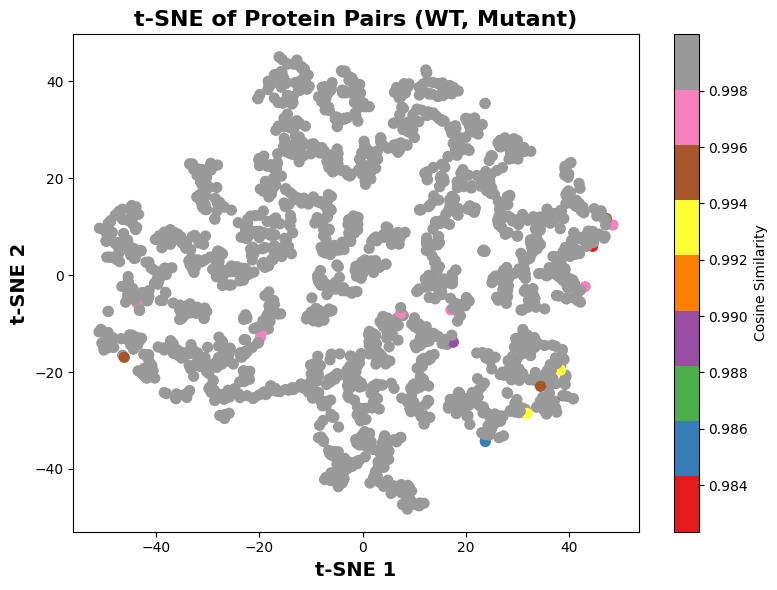

In [35]:
fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_coords[:, 0],
    tsne_coords[:, 1],
    c=df["cosine_similarity"],
    cmap="Set1",
    s=50
)
plt.colorbar(scatter, label="Cosine Similarity")
plt.title("t-SNE of Protein Pairs (WT, Mutant)",fontsize=16, weight='bold')
plt.xlabel("t-SNE 1", fontsize=14, weight='bold')
plt.ylabel("t-SNE 2", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
#fig.savefig("../output/figure/2000_tsne_wt_mutant_cos.tiff", dpi=300)
plt.close()


In [36]:
# Embed each protein individually
protein1_embeddings = []
protein2_embeddings = []

for _, row in df.iterrows():
    try:
        emb1 = row["protein1_embedding"]
        emb2 = row["protein2_embedding"]
        protein1_embeddings.append(emb1)
        protein2_embeddings.append(emb2)
    except Exception as e:
        print("Embedding error:", e)

# Stack all embeddings (wild-type first, then mutant)
all_embeddings = np.vstack([protein1_embeddings, protein2_embeddings])


In [37]:
# Run t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_coords = tsne.fit_transform(all_embeddings)

/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


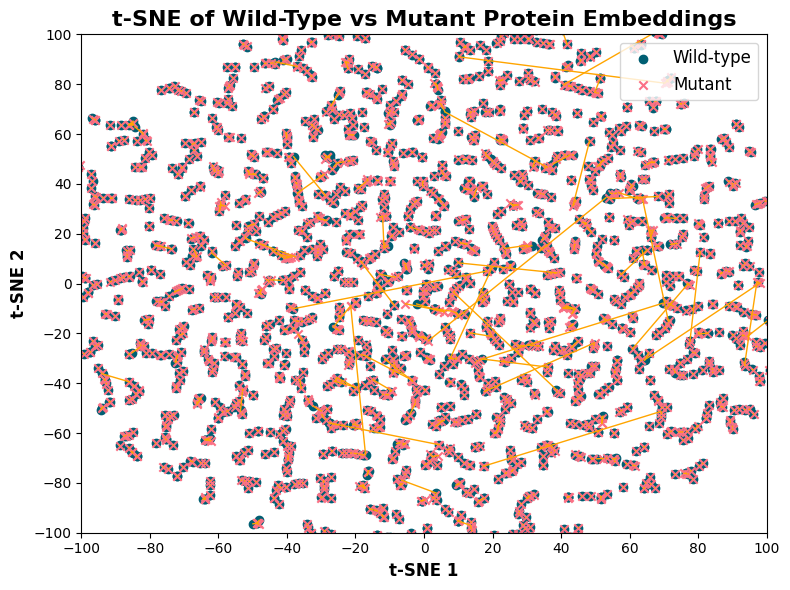

In [38]:

# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = tsne_coords[:n]
pt2_coords = tsne_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("t-SNE of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xticks(np.arange(-100, 101, 20))
plt.yticks(np.arange(-100, 101, 20))

plt.xlabel("t-SNE 1", fontsize=12, fontweight='bold')
plt.ylabel("t-SNE 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Save as high-quality figure
#fig.savefig("../output/figure/2000_tsne_wt_mutant.tiff", dpi=300)
plt.close()

In [39]:
umap_coords = UMAP(n_components=2, random_state=42).fit_transform(all_embeddings)


/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


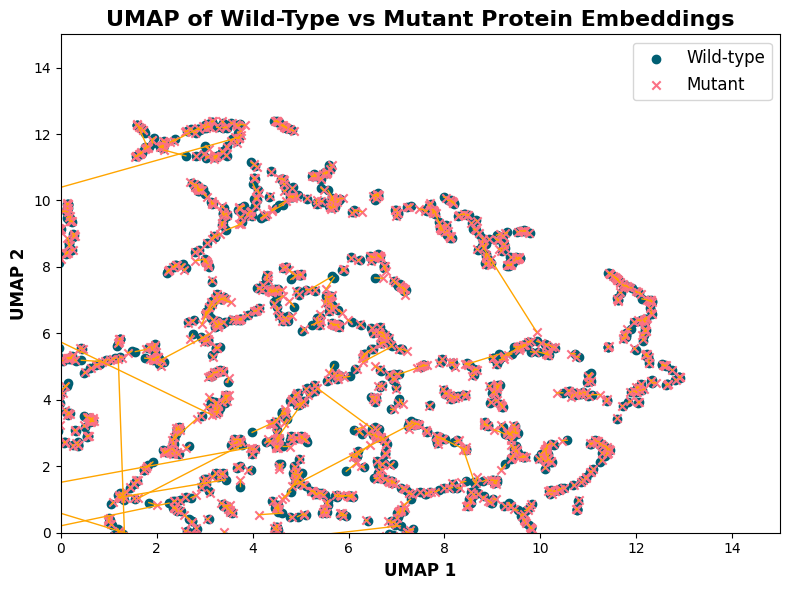

In [40]:
# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = umap_coords[:n]
pt2_coords = umap_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(0, 15)
plt.ylim(0, 15)
#plt.xticks(np.arange(-60, 61, 10))
#plt.yticks(np.arange(-50, 51, 10))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
#fig.savefig("../output/figure/2000_umap_wt_mutant.tiff", dpi=300)
plt.close()


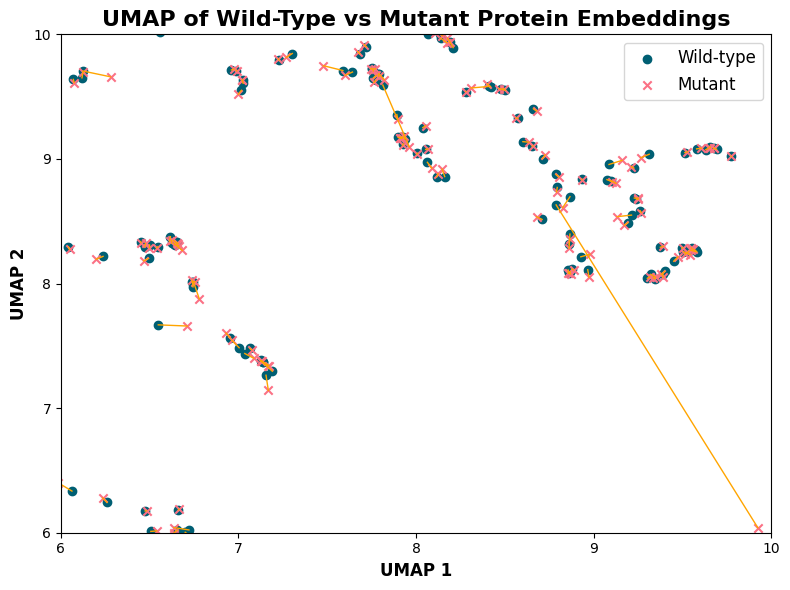

In [41]:

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(6, 10)
plt.ylim(6, 10)
plt.xticks(np.arange(6, 11, 1))
plt.yticks(np.arange(6, 11, 1))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
#fig.savefig("../output/figure/2000_umap_zoomed_wt_mutant.tiff", dpi=300)
plt.close()
